In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import os
import keras
from keras.models import Sequential
from keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from keras.utils.vis_utils import plot_model

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
csv = pd.read_csv("/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv")
csv

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [3]:
label_encoder = LabelEncoder()
label_encoder.fit(csv['dx'])
LabelEncoder()
print(label_encoder.classes_)


['akiec' 'bcc' 'bkl' 'df' 'mel' 'nv' 'vasc']


In [4]:
csv['dx'] = label_encoder.transform(csv['dx'])
csv.sample(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization
4536,HAM_0002636,ISIC_0031782,5,follow_up,45.0,female,trunk
240,HAM_0003659,ISIC_0033676,2,histo,85.0,male,upper extremity
300,HAM_0004114,ISIC_0026844,2,histo,75.0,male,back
5412,HAM_0005709,ISIC_0028569,5,follow_up,70.0,male,lower extremity
9126,HAM_0002936,ISIC_0024380,5,histo,60.0,male,back
5526,HAM_0002315,ISIC_0028312,5,follow_up,50.0,male,abdomen
7440,HAM_0000747,ISIC_0034319,5,histo,30.0,male,trunk
6511,HAM_0007411,ISIC_0028444,5,follow_up,70.0,male,abdomen
9494,HAM_0005062,ISIC_0033617,5,consensus,70.0,female,back
6102,HAM_0001233,ISIC_0029110,5,follow_up,35.0,male,upper extremity


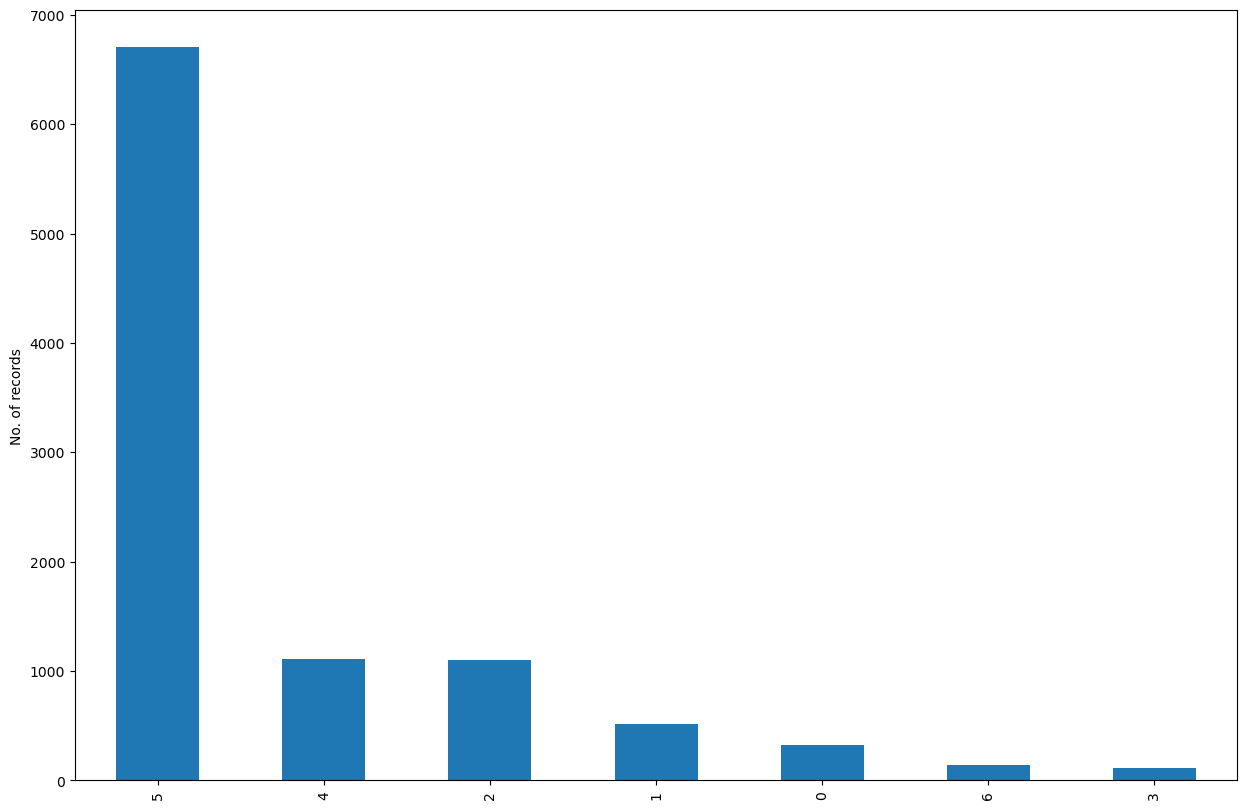

In [5]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot()
csv['dx'].value_counts().plot(kind = 'bar')
ax1.set_ylabel('No. of records')
plt.show()

In [6]:
csv['dx'].value_counts()

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: dx, dtype: int64

In [7]:
label_0 = csv[csv['dx'] == 0]
label_1 = csv[csv['dx'] == 1]
label_2 = csv[csv['dx'] == 2]
label_3 = csv[csv['dx'] == 3]
label_4 = csv[csv['dx'] == 4]
label_5 = csv[csv['dx'] == 5]
label_6 = csv[csv['dx'] == 6]

no_of_samples = 1000

label_0 = resample(label_0, replace = True, n_samples= no_of_samples)
label_1 = resample(label_1, replace = True, n_samples= no_of_samples)
label_2 = resample(label_2, replace = True, n_samples= no_of_samples)
label_3 = resample(label_3, replace = True, n_samples= no_of_samples)
label_4 = resample(label_4, replace = True, n_samples= no_of_samples)
label_5 = resample(label_5, replace = True, n_samples= no_of_samples)
label_6 = resample(label_6, replace = True, n_samples= no_of_samples)

csv = pd.concat([label_0, label_1, label_2, label_3, label_4, label_5, label_6])
csv['dx'].value_counts()

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
Name: dx, dtype: int64

In [8]:
ip = {os.path.splitext(os.path.basename(x))[0] : x
             for x in glob(os.path.join('/kaggle/input/skin-cancer-mnist-ham10000/', '*', '*.jpg'))}


size = 32
csv['image_path'] = csv['image_id'].map(ip.get)
csv['rgb_value'] = csv['image_path'].map(lambda x: np.asarray(Image.open(x).resize((size, size))))

In [9]:
feature = np.asarray(csv['rgb_value'].tolist())
feature = feature/255.0
label = csv['dx']
feature = np.expand_dims(feature, axis = 1)
feature = np.repeat(feature, 20, axis = 1)
feature.shape

(7000, 20, 32, 32, 3)

In [10]:
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size = 0.3)

In [11]:
model = keras.models.Sequential()

In [12]:
# height = 64, width = 64, seq_length = 20
IMAGE_HEIGHT = 32
IMAGE_WIDTH = 32
SEQUENCE_LENGTH = 20
model.add(layers.ConvLSTM2D(filters = 4, kernel_size= (3, 3), activation = 'tanh', recurrent_dropout= 0.2, return_sequences= True, input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
model.add(layers.MaxPooling3D(pool_size = (1, 2, 2), padding = 'same'))

In [13]:
model.add(layers.ConvLSTM2D(filters = 8, kernel_size = (3, 3), activation= 'tanh', recurrent_dropout= 0.2, return_sequences= True))


model.add(layers.MaxPooling3D(pool_size = (1, 2, 2), padding = 'same'))


In [14]:
model.add(layers.ConvLSTM2D(filters = 16, kernel_size = (3, 3), activation= 'tanh', recurrent_dropout= 0.2, return_sequences= True))


model.add(layers.MaxPooling3D(pool_size = (1, 2, 2), padding = 'same'))

In [15]:
model.add(layers.Flatten())


model.add(layers.Dense(32, activation=  'softmax'))

In [16]:
# printing summary of the CNN created so far
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 20, 30, 30, 4)     1024      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 20, 15, 15, 4)    0         
 )                                                               
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 20, 13, 13, 8)     3488      
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 20, 7, 7, 8)      0         
 3D)                                                             
                                                                 
 conv_lstm2d_2 (ConvLSTM2D)  (None, 20, 5, 5, 16)      13888     
                                                                 
 max_pooling3d_2 (MaxPooling  (None, 20, 3, 3, 16)     0

In [17]:
# calculating loss with 'SparseCatergoricalCrossEntropy'
# it computes loss between labels and predictions
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [18]:
# using optimizer that implements Adam's algorithm
# we have 'accuracy' as our metric that we calculate
optim = keras.optimizers.Adam(learning_rate = 0.005)
metrics = ['accuracy']

In [19]:
# here we compile the model with parameters such as:
# optimizer, loss and metrics
model.compile(optimizer = optim, loss = loss, metrics= metrics)

In [20]:

# specifying 'batch size' and 'epoch'
batch_size = 128
epoch = 8

In [21]:

# training the model using 'fit' function passing:
# training images and labels, epochs, batch size and verbose
mod = model.fit(feature_train, label_train, epochs = epoch, batch_size = batch_size, verbose = 1)

Epoch 1/8


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


39/39 [==============================] - 269s 7s/step - loss: 2.0773 - accuracy: 0.1573
Epoch 2/8
39/39 [==============================] - 260s 7s/step - loss: 1.8090 - accuracy: 0.2335
Epoch 3/8
39/39 [==============================] - 261s 7s/step - loss: 1.6644 - accuracy: 0.3253
Epoch 4/8
39/39 [==============================] - 260s 7s/step - loss: 1.5380 - accuracy: 0.3943
Epoch 5/8
39/39 [==============================] - 258s 7s/step - loss: 1.4524 - accuracy: 0.4227
Epoch 6/8
39/39 [==============================] - 254s 7s/step - loss: 1.3012 - accuracy: 0.5029
Epoch 7/8
39/39 [==============================] - 264s 7s/step - loss: 1.2713 - accuracy: 0.5200
Epoch 8/8
39/39 [==============================] - 268s 7s/step - loss: 1.1798 - accuracy: 0.5512


In [22]:

mod = model.evaluate(feature_test, label_test, batch_size = batch_size, verbose = 1)

17/17 [==============================] - 29s 2s/step - loss: 1.2023 - accuracy: 0.5390
